## Importación de librerías

In [69]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

## Carga de archivos CSV

In [70]:
# cargar el documento csv con pd.read_csv, creando el dataframe
df_salticidae_mexico_conabio = pd.read_csv('/Users/stam/Documents/Documents_MacBook_Eduardo/GitHub/jumping_spider_salticidae/limpieza/salticidae_mexico_conabio.csv')

## Análisis exploratorio

In [71]:
# datos cargados
# muestra las primeras filas del dataframe
df_salticidae_mexico_conabio.head(3)

,idejemplar,coleccion,institucion,paiscoleccion,fechacolecta,diacolecta,mescolecta,aniocolecta,fechadeterminacion,diadeterminacion,...,geovalidacion,validacionambiente,usvserieI,usvserieII,usvserieIII,usvserieIV,usvserieV,usvserieVI,usvserieVII,geoportal
0,2b8c370d2d52f42f8b330f461ac4d614,CARCIB Colección Aracnológica,CIBNOR Centro de Investigaciones Biológicas de...,MEXICO,2017-08-28,28.0,8.0,2017.0,2017-09-30,30.0,...,Válido municipio 2022,Válido,DESPROVISTO DE VEGETACIÓN,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,1
1,72ad37ee59849904ebd0896a7ea23909,Naturalista Naturalista,CONABIO Comisión Nacional para el Conocimiento...,MEXICO,2019-08-13,13.0,8.0,2019.0,2019-08-16,16.0,...,Válido país 2022. No aplica validación de esta...,Válido,NaN,AGRICULTURA DE TEMPORAL PLANTACION AGRICOLA PE...,AGRICULTURA DE TEMPORAL PLANTACION AGRICOLA PE...,AGRICULTURA DE TEMPORAL PLANTACION AGRICOLA PE...,AGRICULTURA DE TEMPORAL PERMANENTE,AGRICULTURA DE TEMPORAL PERMANENTE,AGRICULTURA DE TEMPORAL PERMANENTE,1
2,1a48cb5bb51b1655e305e7d0f5d9dcab,CARCIB Colección Aracnológica,CIBNOR Centro de Investigaciones Biológicas de...,MEXICO,2017-08-28,28.0,8.0,2017.0,2017-09-30,30.0,...,Válido municipio 2022,Válido,DESPROVISTO DE VEGETACIÓN,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,1


In [72]:
# dimensión del dataframe
print(f"Número de filas: {df_salticidae_mexico_conabio.shape[0]}")
print(f"Número de columnas: {df_salticidae_mexico_conabio.shape[1]}")

Número de filas: 11278
Número de columnas: 69


## Arañas salticidae en México

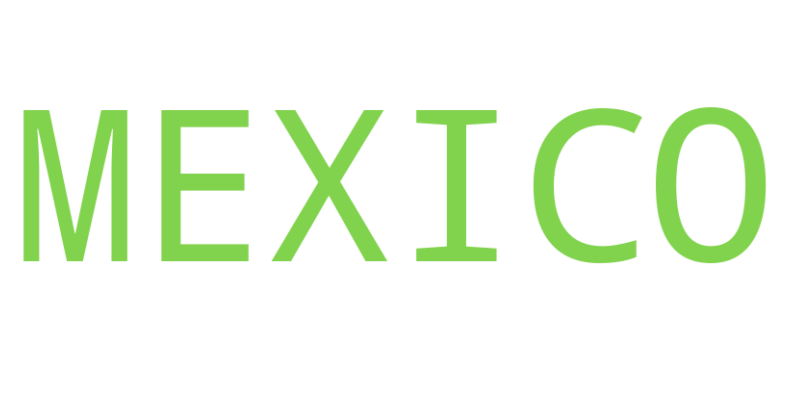

In [73]:
paisoriginal_df = df_salticidae_mexico_conabio['paisoriginal'].value_counts()

# word cloud
# generar el texto a partir de generovalido 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(paisoriginal_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

In [74]:
# crear una paleta de colores con 'viridis'
colors = sns.color_palette('viridis', n_colors=10)[::-1]

In [75]:
#¿Cómo se distribuyen las arañas por género?
# Contar el número de especies por género

# Eliminar filas donde 'especievalida' contiene "sp."
generos_mas_comunes = df_salticidae_mexico_conabio[~df_salticidae_mexico_conabio['especievalida'].str.contains("sp.", na=False)]

# Contar el número de especies por género después de eliminar las filas
generos_mas_comunes_df = generos_mas_comunes['generovalido'].value_counts()

# Mostrar los géneros más comunes
print("Géneros más comunes en México:")
print(generos_mas_comunes_df.head(10))

Géneros más comunes en México:
generovalido
Paraphidippus    2578
Menemerus        1990
Phidippus        1915
Habronattus       588
Plexippus         400
Colonus           345
Messua            289
Hasarius          243
Sassacus          225
Metacyrba         150
Name: count, dtype: int64


In [76]:
#¿Cuántos géneros únicos de Salticidae hay en México?
generos_unicos = df_salticidae_mexico_conabio['generovalido'].nunique()
print(f"Géneros únicos de Salticidae en México: {generos_unicos}")

Géneros únicos de Salticidae en México: 77


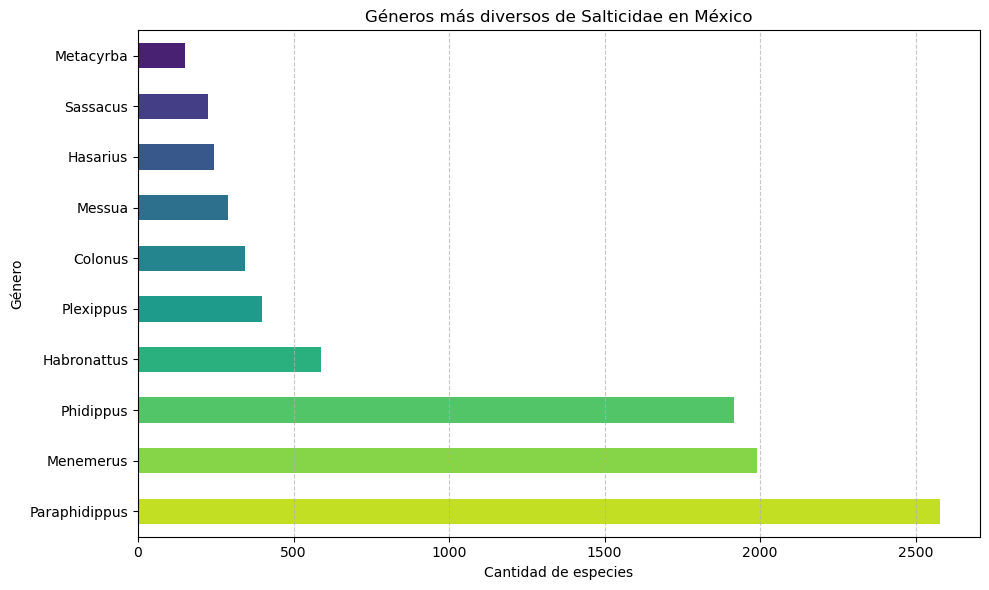

In [77]:
generos_mas_comunes_df.head(10).plot(kind='barh', color=colors, figsize=(10, 6))
plt.title('Géneros más diversos de Salticidae en México')
plt.xlabel('Cantidad de especies')
plt.ylabel('Género')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

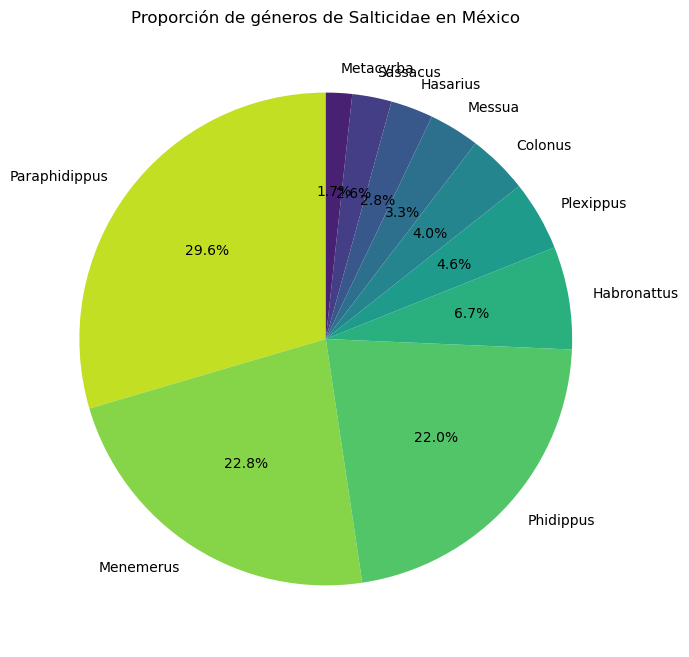

In [78]:
generos_mas_comunes_df.head(10).plot(kind='pie', autopct='%1.1f%%',colors=colors, figsize=(8, 8), startangle=90)
plt.title('Proporción de géneros de Salticidae en México')
plt.ylabel('')
plt.show()

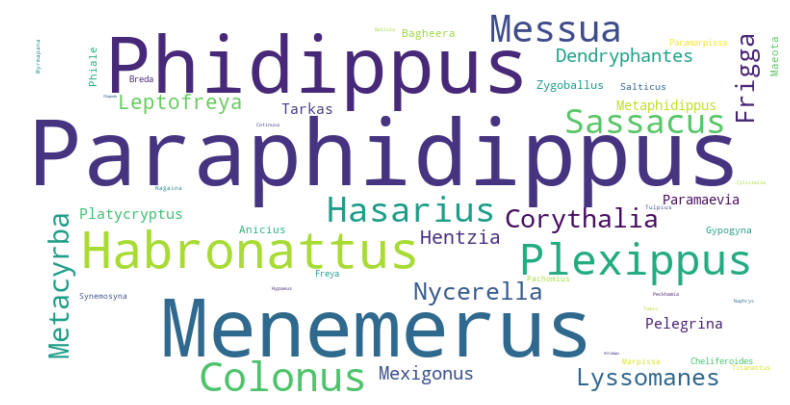

In [79]:
# word cloud
# generar el texto a partir de generovalido
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(generos_mas_comunes_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

In [80]:
#¿Cuántas especies únicas hay en México?
# Contar especies únicas
especies_unicas = generos_mas_comunes['especievalida'].nunique()
print(f"Cantidad de especies únicas en México: {especies_unicas}")

Cantidad de especies únicas en México: 205


In [81]:
especies_unicas_df = generos_mas_comunes['especievalida'].value_counts()
especies_unicas_df.head(10)

especievalida
Paraphidippus aurantius    2064
Menemerus bivittatus       1853
Phidippus audax             520
Paraphidippus fartilis      507
Plexippus paykulli          391
Colonus sylvanus            339
Phidippus arizonensis       291
Messua limbata              285
Hasarius adansoni           243
Phidippus cruentus          212
Name: count, dtype: int64

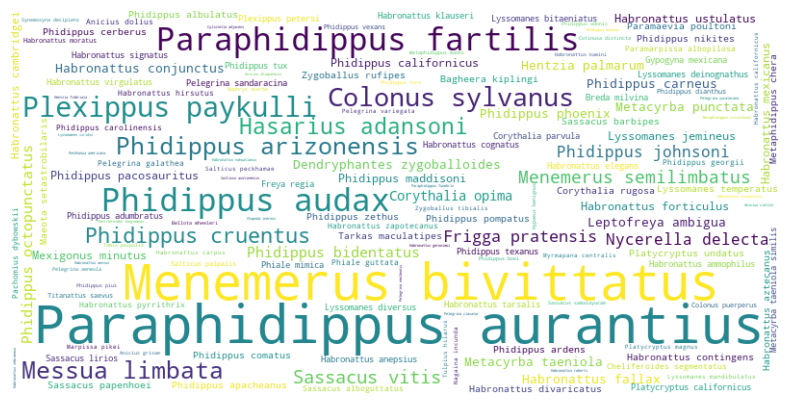

In [82]:
# word cloud
# generar el texto a partir de especiesvalido
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(especies_unicas_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

### Distribución